## LINEAR REGRESSION

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#### Importing data from text file
The dataset conatins population of the city and profits from food trucks

In [2]:
filename = 'food_truck_data.txt'
data = np.loadtxt(filename, delimiter=',', dtype=float)
# storing data in row based arrays
population=np.c_[data[:,0]]
profits=np.c_[data[:,1]]
print("dataset=",data[:5,:])
print("population =",population[:5,:])
print("profits =",profits[:5,:])

dataset= [[ 6.1101 17.592 ]
 [ 5.5277  9.1302]
 [ 8.5186 13.662 ]
 [ 7.0032 11.854 ]
 [ 5.8598  6.8233]]
population = [[6.1101]
 [5.5277]
 [8.5186]
 [7.0032]
 [5.8598]]
profits = [[17.592 ]
 [ 9.1302]
 [13.662 ]
 [11.854 ]
 [ 6.8233]]


#### plotting population vs profits 

Text(0.5, 1.0, 'Population vs revenues ')

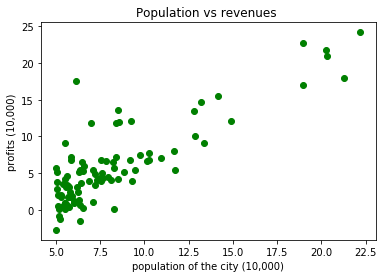

In [3]:
plt.scatter(population,profits,marker='o',color='g')
plt.xlabel('population of the city (10,000)')
plt.ylabel('profits (10,000)')
plt.title('Population vs revenues ')

### Analysis of the scatter plot
The revenue increases with respect to the population of the city, but we can also find for some city with less population. The revenue is less than zero indicating that it is facing losses.

### Performing linear regression on this model 

To build linear regression model, we need to build cost function which calcualtes the mean squared error of the hypothesis

In [4]:
def cost_function(X,Y,weights):
    '''
    X= feature of the model size (n+1,m) n=no of feature m=no of training examples
    Y= actual value of the model
    parameters= weight functions 
                2 for linear [w0,w1]
    '''
    m=Y.shape[0] # Number of training examples
    #print(m)
    hypothesis=np.dot(X,weights)
    J=np.sum((hypothesis-Y)**2)/(2*m)
    return J


In [5]:
def gradient_descent(X,Y,weights,learning_rate,num_iteration=250):
    m=X.shape[0] # number of training sets
    n=X.shape[1]
    J_history=[]
    dweight=np.zeros((n,1))
    for i in range(0,num_iteration):
        hypothesis=np.dot(X,weights)
        #print(hypothesis)
        dweights=np.dot(X.T,(hypothesis-Y))/m
        weights= weights-learning_rate*dweights
        J_history.append(cost_function(X,Y,weights))
    return weights,J_history

In [6]:
def linear_regression_model(train_data,initial_weights=[[0] ,[0]],learning_rate=0.01,num_iteration=2500):
    X=np.c_[np.ones(data.shape[0]),data[:,0]]
    Y=np.c_[data[:,1]]
    final_weights,cost_history=gradient_descent(X,Y,initial_weights,learning_rate,num_iteration)
    return final_weights,cost_history

In [7]:
parameters,loss_function=linear_regression_model(data)

Text(0.5, 1.0, 'MINIMIZATION OF COST FUNCTION ')

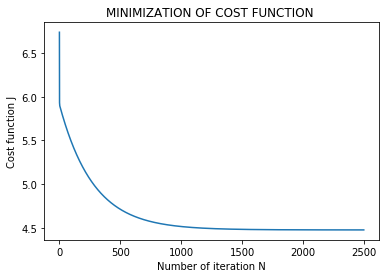

In [8]:
plt.plot(np.arange(0,len(loss_function)),loss_function)
plt.xlabel('Number of iteration N')
plt.ylabel('Cost function J')
plt.title("MINIMIZATION OF COST FUNCTION ")

In [9]:
print("Weight for following model=",parameters)

Weight for following model= [[-3.85208068]
 [ 1.18864349]]


### Comparing my model with standard model from sklearn linear regression

In [10]:
from sklearn.linear_model import LinearRegression
model_LR = LinearRegression()
model_LR.fit(population, profits)
print("Accuracy of the model:", model_LR.score(population, profits))
model_parameters=[]
model_parameters.append(model_LR.intercept_[0])
model_parameters.append(model_LR.coef_[0,0])
print("parameters from model",np.array(model_parameters).T)
print("The difference in weight for skleran model and my implementation",(model_parameters-parameters.ravel()))

Accuracy of the model: 0.7020315537841397
parameters from model [-3.89578088  1.19303364]
The difference in weight for skleran model and my implementation [-0.0437002   0.00439016]


#### prediction of new revenue for given population

In [11]:

predict1=[1,10]
revenue=np.dot(predict1,parameters)
print('predicting values using my implementation')
print('The revenue of the city with population 100 K is ',revenue*10000)
model_revenue=np.dot(predict1,model_parameters)
print('predicting values using my sklearn linear regression model')
print('The revenue of the city with population 100 K is ',model_revenue*10000)
print("difference:",model_revenue-revenue)

predicting values using my implementation
The revenue of the city with population 100 K is  [80343.54172617]
predicting values using my sklearn linear regression model
The revenue of the city with population 100 K is  80345.55563584085
difference: [0.00020139]


### plotting linear regression 

Text(0.5, 1.0, 'Comparition of models')

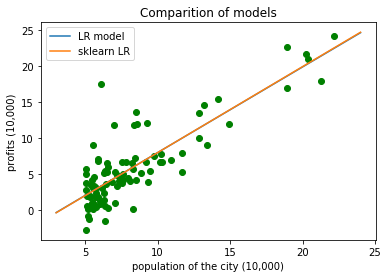

In [12]:

X_inputs=np.arange(3,25)
Y=parameters[0]+parameters[1]*X_inputs
Y_model=model_parameters[0]+model_parameters[1]*X_inputs
plt.scatter(population,profits,marker='o',color='g')
plt.plot(X_inputs,Y,label='LR model')
plt.plot(X_inputs,Y_model,label='sklearn LR')
plt.xlabel('population of the city (10,000)')
plt.ylabel('profits (10,000)')
plt.legend()
plt.title('Comparition of models')